# Stroke Prediction Dataset
### 11 clinical features por predicting stroke events

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

1) id: unique identifier    
2) gender: "Male", "Female" or "Other"    
3) age: age of the patient    
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension    
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease    
6) ever_married: "No" or "Yes"    
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"    
8) Residence_type: "Rural" or "Urban"     
9) avg_glucose_level: average glucose level in blood    
10) bmi: body mass index    
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*    
12) stroke: 1 if the patient had a stroke or 0 if not    
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient    

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
ds = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter=',')

In [5]:
ds.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [6]:
ds.drop(['id'], axis=1, inplace=True)

In [7]:
ds.stroke[ds.gender == 'Other']

3116    0
Name: stroke, dtype: int64

In [8]:
ds.drop([3116], inplace=True)

In [9]:
ds.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
columns_numeric = ['age', 'avg_glucose_level', 'bmi']
columns_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status']
columns_dummis = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
columns_target = ['stroke']

In [11]:
def replace_nan(data, to_replace, replacement_data):
    
    data_def = data.copy(deep=True)
    
    index_zero = list(data_def[to_replace][data_def[replacement_data] == 0].index)
    index_one = list(data_def[to_replace][data_def[replacement_data] == 1].index)
    
    for i in range(2):
        minimum = data_def[to_replace][data_def[replacement_data] == i].quantile(0.25)
        maximum = data_def[to_replace][data_def[replacement_data] == i].quantile(0.75)
        
        minimum -= (maximum - minimum) * 0.5
        maximum += (maximum - minimum) * 0.5
    
        count = data_def[to_replace][data_def[replacement_data] == i].isnull().sum()
        
        data_for_nan = np.random.choice(range(int(minimum), int(maximum)), count)
    
        if i == 0:
            index_null = data_def[to_replace][index_zero][data_def[to_replace].isnull()].index
        else:
            index_null = data_def[to_replace][index_one][data_def[to_replace].isnull()].index
        
        data_def[to_replace][index_null] = data_for_nan
        
    return data_def

In [12]:
ds = replace_nan(ds, 'bmi', 'stroke')

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 639.0+ KB


In [14]:
ds = pd.get_dummies(ds, columns=columns_dummis, prefix_sep='_', drop_first=True)

In [15]:
ds.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,35.0,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
ds_train, ds_test = train_test_split(ds, test_size=0.3, random_state=42, stratify=ds.stroke)

In [18]:
ds_train.stroke.value_counts(normalize=True), ds_test.stroke.value_counts(normalize=True)

(0    0.951342
 1    0.048658
 Name: stroke, dtype: float64,
 0    0.951076
 1    0.048924
 Name: stroke, dtype: float64)

In [19]:
ds_train.shape[0] + ds_test.shape[0], ds.shape

(5109, (5109, 16))

In [20]:
add_rows = int(ds_train.stroke.value_counts()[0] * .8 - ds_train.stroke.value_counts()[1])
add_rows

2547

In [21]:
int(add_rows / ds_train.stroke.value_counts()[1]), ds_train.stroke.value_counts()

(14,
 0    3402
 1     174
 Name: stroke, dtype: int64)

In [22]:
index_train_one = ds_train.stroke[ds_train.stroke == 1].index
ds_train_one = ds_train.loc[index_train_one]

In [23]:
for i in range(14):
    ds_train = ds_train.append(ds_train_one)
    #y_train = pd.concat([y_train, y_train[y_train == 1]])

In [24]:
ds_train.stroke.value_counts(normalize=True)

0    0.565868
1    0.434132
Name: stroke, dtype: float64

In [25]:
from sklearn.utils import shuffle

In [26]:
ds_train = shuffle(ds_train)

### --------------- metrics ------------------------

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve

In [28]:
def print_metrics(actual, predict):
    print('Accuracy: {:.3f}'.format(accuracy_score(actual, predict)))
    print('Precision: {:.3f}'.format(precision_score(actual, predict)))
    print('Recall: {:.3f}'.format(recall_score(actual, predict)))
    print('F1 score: {:.3f}'.format(f1_score(actual, predict, average='weighted')))

In [29]:
def plot_roc_auc(actual, predict):
    
    fpr, tpr, threshold = roc_curve(actual, predict)
    plt.plot(fpr, tpr, color='b')
    #plt.plot()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0.0, 1.0], [0.0, 1.0], color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC = {:.3f}'.format(roc_auc_score(actual, predict)))

### ---------- Random Forest ------------------

In [30]:
from sklearn.ensemble import RandomForestClassifier

#### selection of parameters

In [31]:
%%time
best_f1 = []
best_recall = []
best_roc_auc = []
best_precision = [] 
x = []
x_keys = []
n = 0

for cr in ['gini', 'entropy']:
    for mln in [5, 3, None]:
        for mf in [1, 2, 3, 'auto']:
            for boot in [True, False]:
                model = RandomForestClassifier(n_estimators=1000, criterion=cr, max_leaf_nodes=mln, 
                                               max_features=mf, bootstrap=boot, random_state=16, n_jobs=-1)
                
                model.fit(ds_train.drop(['stroke'], axis=1), ds_train.stroke)
                y_pred = model.predict(ds_test.drop(['stroke'], axis=1))
                
                f1 = f1_score(ds_test.stroke, y_pred)
                best_f1.append(f1)
                
                recall = recall_score(ds_test.stroke, y_pred)
                best_recall.append(recall)
                
                precision = precision_score(ds_test.stroke, y_pred)
                best_precision.append(precision)
                
                y_pred_prob = model.predict_proba(ds_test.drop(['stroke'], axis=1))
                roc_auc = roc_auc_score(ds_test.stroke, y_pred_prob[:, 1])
                best_roc_auc.append(roc_auc)
                
                x_keys.append(str(cr) +' '+ str(mln) +' '+ str(mf) +' '+ str(boot))
                x.append(n)
                n += 1

CPU times: user 4min 15s, sys: 25.6 s, total: 4min 41s
Wall time: 2min 7s


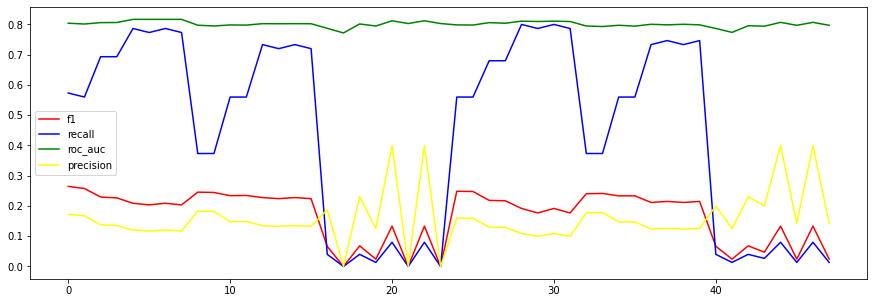

In [32]:
plt.figure(figsize=(15, 5))
plt.plot(x, best_f1, c='r', label='f1')
plt.plot(x, best_recall, c='b', label='recall')
plt.plot(x, best_roc_auc, c='green', label='roc_auc')
plt.plot(x, best_precision, c='yellow', label='precision')
plt.legend()
plt.show()

In [33]:
data_score = {'f1': best_f1, 'recall': best_recall, 'precision': best_precision, 'roc_auc': best_roc_auc}

In [34]:
ds_scores = pd.DataFrame(data_score, index=x_keys)

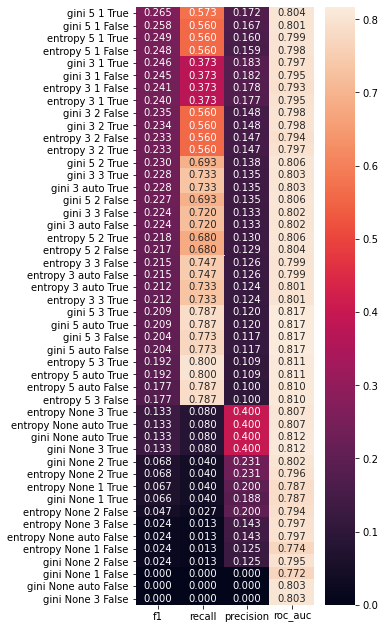

In [35]:
plt.figure(figsize=(4, 11))
sns.heatmap(ds_scores.sort_values(by=['f1'], ascending=False), annot=True, fmt='.3f');

#### We need to identify people susceptible to stroke.    
#### We should be more interested in the metric recall and f1.

optimal model parameters:     
    - criterion      -> gini      
    - max_leaf_nodes -> 5     
    - max_features   -> 1     
    - bootstrap      -> True     



In [36]:
model_rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_leaf_nodes=3, 
                                  max_features='auto', bootstrap=False, random_state=16, 
                                  n_jobs=-1)

In [37]:
model_rf.fit(ds_train.drop(['stroke'], axis=1), ds_train.stroke)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_leaf_nodes=3,
                       n_estimators=1000, n_jobs=-1, random_state=16)

In [38]:
y_pred = model_rf.predict(ds_test.drop(['stroke'], axis=1))

In [39]:
print_metrics(ds_test.stroke, y_pred)

Accuracy: 0.733
Precision: 0.126
Recall: 0.747
F1 score: 0.809


In [40]:
y_pred_prob = model_rf.predict_proba(ds_test.drop(['stroke'], axis=1))

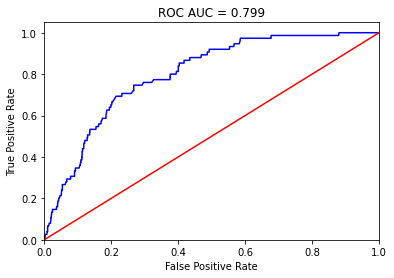

In [41]:
plot_roc_auc(ds_test.stroke, y_pred_prob[:, 1])

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
conf_matrix = confusion_matrix(ds_test.stroke, y_pred)

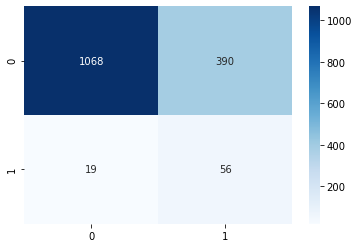

In [44]:
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='');

#### Random_state

In [45]:
%%time
best_f1 = []
best_recall = []
best_roc_auc = []
best_precision = [] 
x = []
x_keys = []
n = 0

for i in range(200):
    model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_leaf_nodes=3, 
                                  max_features='auto', bootstrap=False, random_state=i, 
                                  n_jobs=-1)
    
    model.fit(ds_train.drop(['stroke'], axis=1), ds_train.stroke)
    y_pred = model.predict(ds_test.drop(['stroke'], axis=1))
    
    f1 = f1_score(ds_test.stroke, y_pred)
    best_f1.append(f1)
    
    recall = recall_score(ds_test.stroke, y_pred)
    best_recall.append(recall)
                                
    precision = precision_score(ds_test.stroke, y_pred)
    best_precision.append(precision)
                                
    y_pred_prob = model.predict_proba(ds_test.drop(['stroke'], axis=1))
    roc_auc = roc_auc_score(ds_test.stroke, y_pred_prob[:, 1])
    best_roc_auc.append(roc_auc)
    
    x.append(n)
    n += 1   

CPU times: user 13min 33s, sys: 1min 19s, total: 14min 53s
Wall time: 6min 59s


In [46]:
best_rs = pd.DataFrame({'f1': best_f1, 'recall': best_recall, 'precision': best_precision, 
                        'roc_auc': best_roc_auc}, index=x)

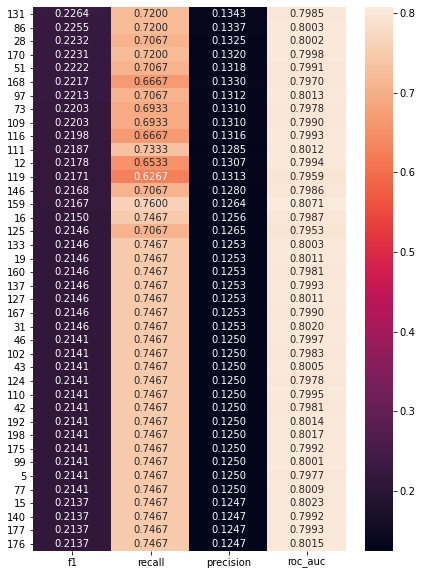

In [47]:
plt.figure(figsize=(7, 10))
sns.heatmap(best_rs.sort_values(by=['f1'], ascending=False)[:40], annot=True, fmt='.4f');

In [48]:
model_rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_leaf_nodes=3, 
                                  max_features='auto', bootstrap=False, random_state=159, 
                                  n_jobs=-1)

In [49]:
model_rf.fit(ds_train.drop(['stroke'], axis=1), ds_train.stroke)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_leaf_nodes=3,
                       n_estimators=1000, n_jobs=-1, random_state=159)

In [50]:
y_pred = model_rf.predict(ds_test.drop(['stroke'], axis=1))

#### finding the optimal threshold

In [51]:
f1_sc = []
threshold = []
rec_sc = []
prec_sc = []

for i in np.linspace(0.0, 1.0, 1000):
    recall_sc = recall_score(ds_test.stroke, y_pred_prob[:, 1] > i)
    precision_sc = precision_score(ds_test.stroke, y_pred_prob[:, 1] > i)
    f_one = f1_score(ds_test.stroke, y_pred_prob[:, 1] > i)
    f1_sc.append(f_one)
    threshold.append(i)
    rec_sc.append(recall_sc)
    prec_sc.append(precision_sc)

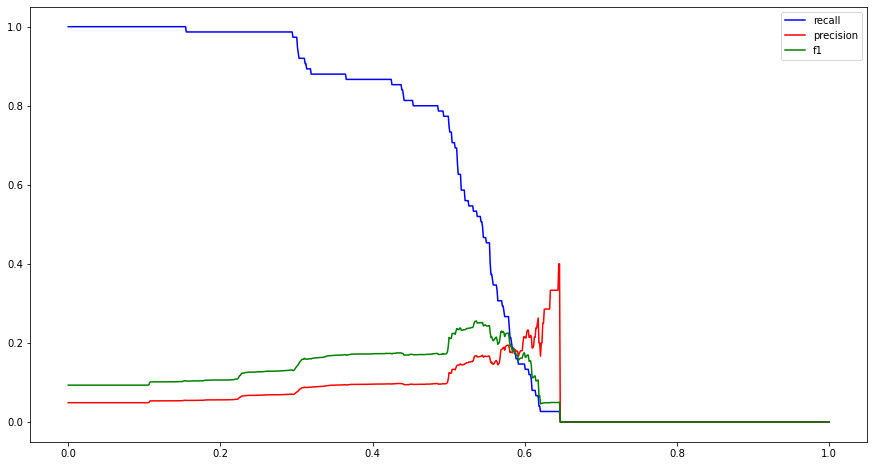

In [52]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.0, 1.0, 1000), rec_sc, color='b', label='recall')
plt.plot(np.linspace(0.0, 1.0, 1000), prec_sc, color='r', label='precision')
plt.plot(np.linspace(0.0, 1.0, 1000), f1_sc, color='green', label='f1')
plt.legend(loc='upper right')
plt.show()

In [53]:
ds_sc = pd.DataFrame({'threshold': threshold,'f1': f1_sc, 'recall': rec_sc, 'precision': prec_sc}, range(len(f1_sc)))

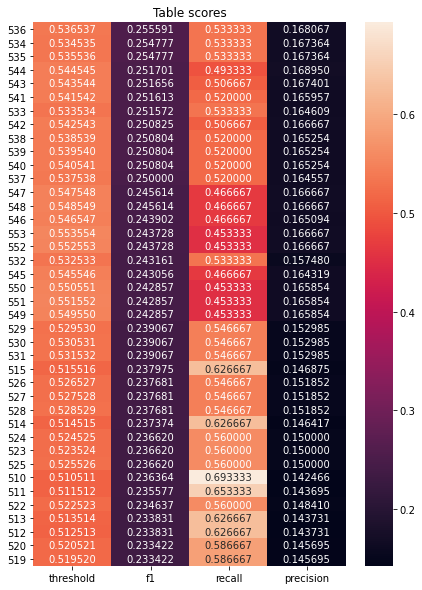

In [54]:
plt.figure(figsize=(7, 10))
sns.heatmap(ds_sc.sort_values(by='f1',ascending=False)[:40], annot=True, fmt='.6f')
plt.title('Table scores');

In [55]:
# optimal threshold
threshold[507]

0.5075075075075075

In [56]:
conf_matrix = confusion_matrix(ds_test.stroke, y_pred_prob[:, 1] > 0.507507507507)

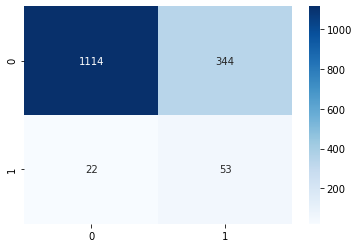

In [57]:
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='');

In [58]:
print_metrics(ds_test.stroke, y_pred_prob[:, 1] > 0.507507507507)

Accuracy: 0.761
Precision: 0.134
Recall: 0.707
F1 score: 0.828


#### Feature Importance

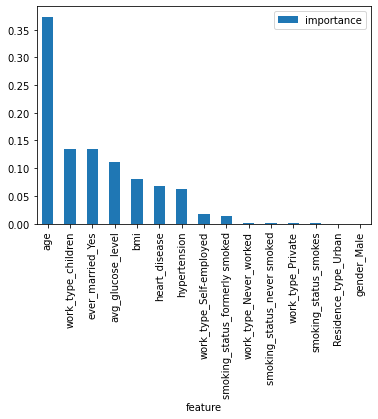

In [59]:
featureImportance = pd.DataFrame({'feature': ds_train.drop(['stroke'], axis=1).columns, 
                                 'importance': model_rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)

featureImportance.sort_values(inplace=True, ascending=False, by=['importance'])

featureImportance.plot(kind='bar');

In [60]:
df_sc_1 = pd.read_csv('ds_scores_0-50.csv')
df_sc_2 = pd.read_csv('ds_scores_50-100.csv')
df_sc_3 = pd.read_csv('ds_scores_100-150.csv')
df_sc_4 = pd.read_csv('ds_scores_150-200.csv')

In [61]:
df_scores = df_sc_1.append(df_sc_2)

In [62]:
df_scores = df_scores.append(df_sc_4)

In [63]:
df_scores.sort_values(by='f1', ascending=False)[:60]

,Unnamed: 0,f1,recall,precision,roc_auc,rand_st
434,gini 3 1 True,0.262295,0.426667,0.189349,0.794531,184
87,gini 5 1 False,0.261438,0.533333,0.173160,0.797348,87
444,gini 3 1 True,0.260090,0.386667,0.195946,0.790855,94
75,gini 5 1 False,0.260062,0.560000,0.169355,0.799159,75
66,gini 5 1 False,0.259819,0.573333,0.167969,0.802295,16
69,gini 5 1 False,0.259819,0.573333,0.167969,0.799104,169
68,gini 5 1 False,0.259587,0.586667,0.166667,0.802958,18
56,gini 5 1 False,0.259587,0.586667,0.166667,0.803041,156
488,gini 3 1 False,0.259414,0.413333,0.189024,0.794687,38
25,gini 5 1 True,0.259259,0.560000,0.168675,0.799232,75


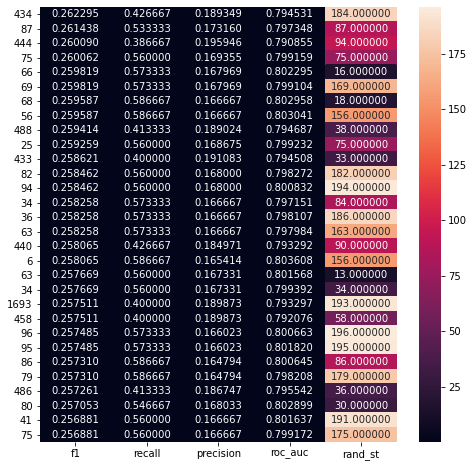

In [66]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_scores.loc[:, 'f1':].sort_values(by='f1', ascending=False)[:30], annot=True, fmt='.6f');